In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../../")

In [77]:
from project.utils.ds.dataset import BoxedExamplesDataset
from pathlib import Path
from project.utils.ds import transforms as tr
from project.utils.ds.images import is_grayscale

In [5]:
train_path = Path("../data/stage1_train/")
ds = BoxedExamplesDataset.from_path(train_path)

670it [04:02,  2.76it/s]


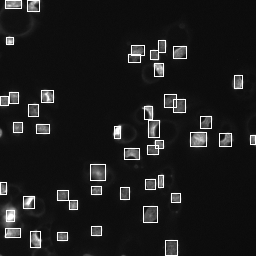

In [26]:
ds[0].vis_boxes(1)

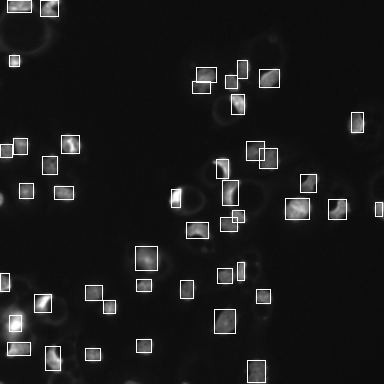

In [29]:
tr.resize(ds[0], 1.5, 1.5).vis_boxes(1)

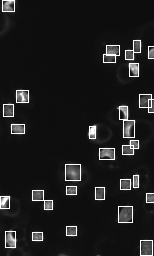

In [30]:
tr.crop(
    ds[0],
    0.1, 0., 0.7, 1
).vis_boxes()

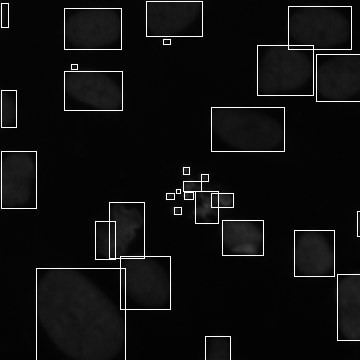

In [68]:
tr.rotate(
    ds[1],
    180
).vis_boxes()

In [78]:
colors = [
    e for e in ds if not is_grayscale(e.image)
]

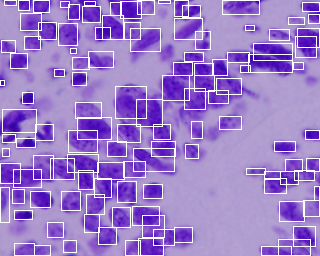

In [83]:
colors[0].vis_boxes()

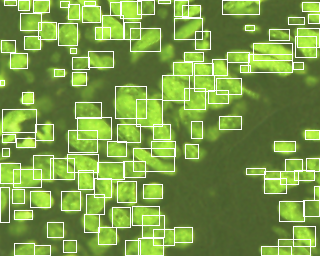

In [104]:
tr.flip_color_on_intensity_heuristic(
    colors[0]
).vis_boxes()